# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

# Import Libraries

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,GradientBoostingClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load the dataset


In [19]:
df=pd.read_csv("/content/drive/MyDrive/T5/week4/Traffic_Jams.csv")

# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

In [4]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [5]:
df.shape

(6324, 9)

In [6]:
df['Traffic Situation'].value_counts()

,count
Traffic Situation,
normal,3858
heavy,1137
low,834
high,495


# **Summary Statistics**

In [7]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000
mean,16.043327,64.355629,12.013283,12.557875,18.658128,107.584915
std,8.956907,44.307088,11.363955,12.319831,10.724822,55.850784
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.000000,3.000000,1.000000,10.000000,53.000000
50%,16.000000,61.000000,9.000000,10.000000,18.000000,103.000000
75%,24.000000,101.250000,19.000000,20.000000,27.000000,151.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


Date :max number of date with jams was day 31 of the month

CarCount: mean of car involved in jams are  64 car  and the max was 180 car


BikeCount: the mean number of bike is 12 12 with max of 70 bike

buscount: the mean of bus involve in jam is 12 with max of 50 bus

truckcount: mean of truck involve in accident is 18 with max of 60 truck

# **Distribution of the Target Variable**

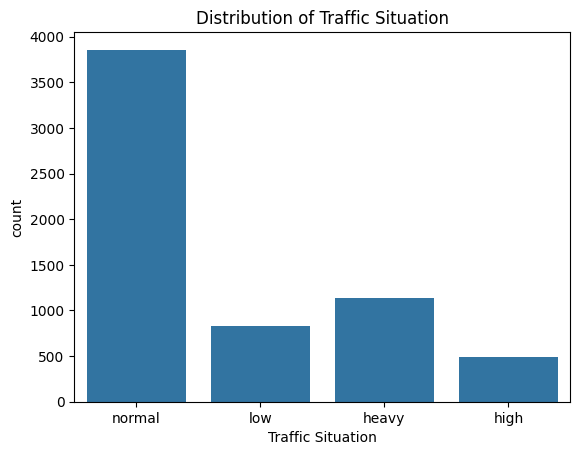

In [8]:
sns.countplot(x='Traffic Situation', data=df)
plt.title('Distribution of Traffic Situation')
plt.show()

# **Correlation Analysis**

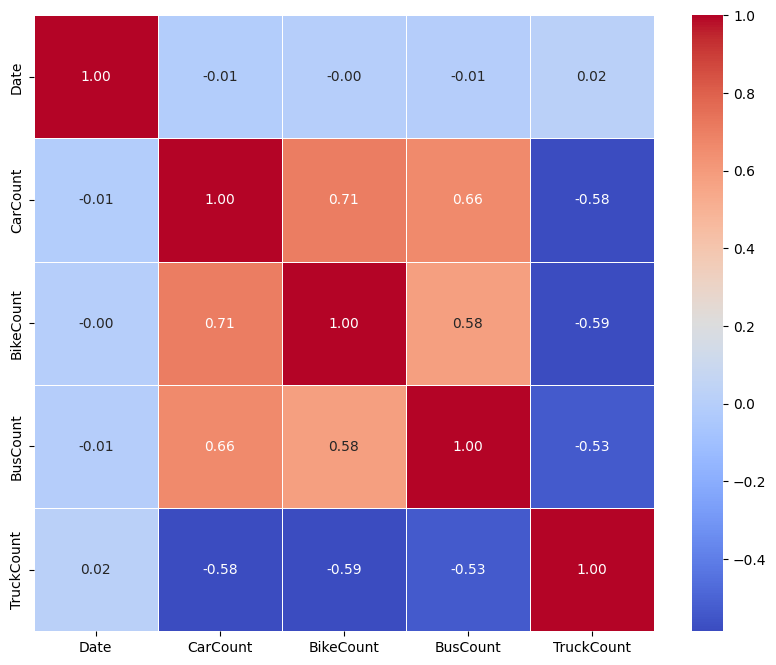

In [9]:
corr_matrix=df[['Date',	'CarCount'	,'BikeCount',	'BusCount'	,'TruckCount']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.show()

# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

# **remove Unnecessary Columns**

In [20]:
df=df.drop('Total', axis=1)
df=df.drop('Time', axis=1)

# **Check for Missing Values**

In [21]:
df.isnull().sum()
#no null values

,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Traffic Situation,0


# **duplication**

In [22]:
df.duplicated().sum()
#no duplication

11

# **Encode Categorical Variables**

In [23]:
df=pd.get_dummies(df,drop_first=True)

# **Feature Scaling**

In [25]:
scaler = MinMaxScaler()
df[['CarCount', 'BikeCount', 'BusCount','TruckCount']] = scaler.fit_transform(df[['CarCount', 'BikeCount', 'BusCount','TruckCount']])

In [26]:
df.sample()

,Date,CarCount,BikeCount,BusCount,TruckCount,Day of the week_Monday,Day of the week_Saturday,Day of the week_Sunday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday,Traffic Situation_high,Traffic Situation_low,Traffic Situation_normal
351,13,0.257143,0.185714,0.02,0.183333,False,False,False,False,False,False,False,True,False


# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

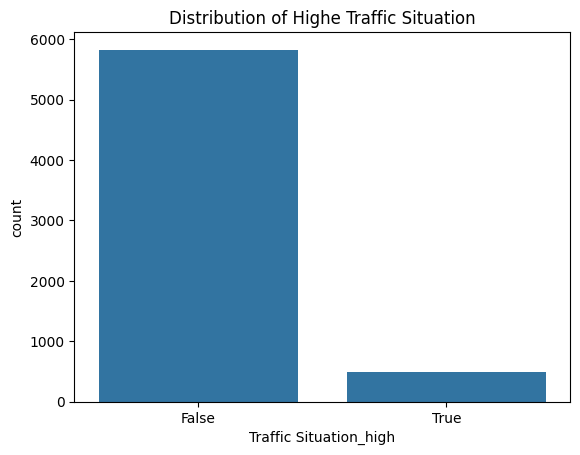

In [28]:
sns.countplot(x='Traffic Situation_high', data=df)
plt.title('Distribution of Highe Traffic Situation')
plt.show()#big diffrent in frequancy distrbution

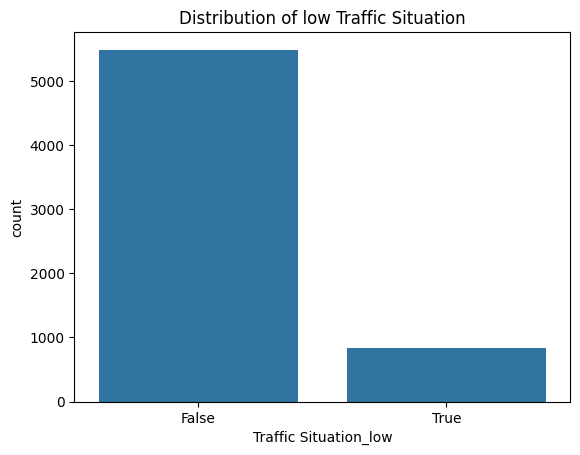

In [29]:
sns.countplot(x='Traffic Situation_low', data=df)
plt.title('Distribution of low Traffic Situation')
plt.show()#big diffrent in frequancy distrbution

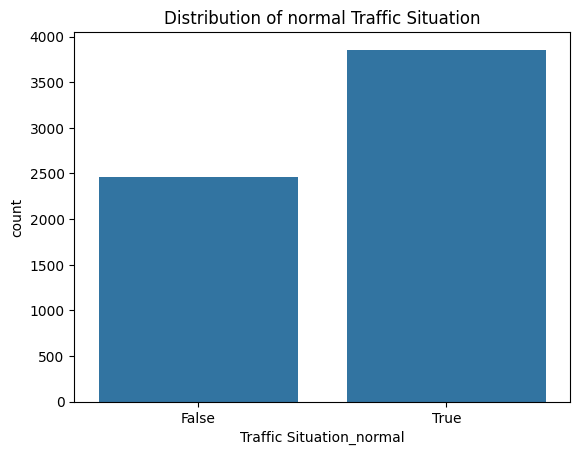

In [30]:
sns.countplot(x='Traffic Situation_normal', data=df)
plt.title('Distribution of normal Traffic Situation')
plt.show()#could be use in the models

# **Correlation Heatmap**

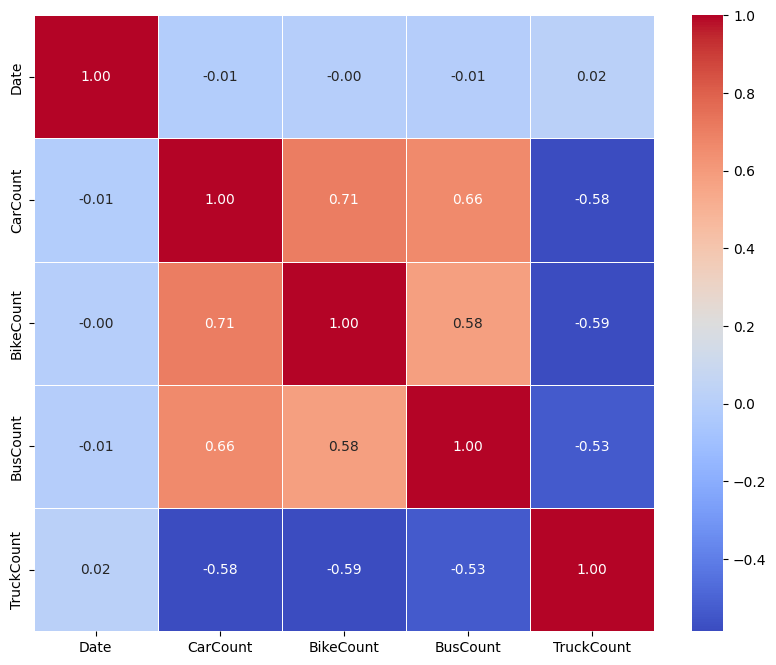

In [32]:
corr_matrix=df[['Date',	'CarCount'	,'BikeCount',	'BusCount'	,'TruckCount']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.show()

# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

In [39]:
x=df.drop(['Traffic Situation_high','Traffic Situation_low','Traffic Situation_normal'],axis=1)#will only use one for the model

y=df['Traffic Situation_normal']#choose normal because the frequance in good balance not like the other visuals

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Initialize and Train the Classifiers

## Bagging
Chose the bagging model to go with and initialize and train a the model.

In [65]:
base_estimator=DecisionTreeClassifier(random_state=42)
bagging_classifier=BaggingClassifier(base_estimator, n_estimators=50, random_state=42)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=50, random_state=42)

### Evaluate the model performance

In [66]:
prediction=bagging_classifier.predict(X_test)
accuracy=accuracy_score(y_test,prediction)
print(f'accuracy of bagging model is :{accuracy*100:.2f}%')

accuracy of bagging model is :87.75%


In [67]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

       False       0.83      0.85      0.84       471
        True       0.91      0.89      0.90       794

    accuracy                           0.88      1265
   macro avg       0.87      0.87      0.87      1265
weighted avg       0.88      0.88      0.88      1265



## Boosting
Chose the Boosting model to go with and initialize and train a the model.

In [68]:
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=50, random_state=42)
gradient_boosting_classifier.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=42)

### Evaluate the model performance

In [69]:
prediction=gradient_boosting_classifier.predict(X_test)
accuracy=accuracy_score(y_test,prediction)
print(f'accuracy of Boosting model is :{accuracy*100:.2f}%')

accuracy of Boosting model is :89.33%


In [70]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

       False       0.86      0.85      0.86       471
        True       0.91      0.92      0.92       794

    accuracy                           0.89      1265
   macro avg       0.89      0.88      0.89      1265
weighted avg       0.89      0.89      0.89      1265



## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

In [71]:
base_models = [
    ('bagging_classifier', BaggingClassifier(base_estimator, n_estimators=50, random_state=42)),
    ('gradient_boosting_classifier',GradientBoostingClassifier(n_estimators=50, random_state=42))
]

### Define meta-learner (LogisticRegression)

In [72]:
meta_model=LogisticRegression()

### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [73]:
stacking_classfier=StackingClassifier(estimators=base_models,final_estimator=meta_model,cv=5)
stacking_classfier.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('bagging_classifier',
                                BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                                  n_estimators=50,
                                                  random_state=42)),
                               ('gradient_boosting_classifier',
                                GradientBoostingClassifier(n_estimators=50,
                                                           random_state=42))],
                   final_estimator=LogisticRegression())

### Evaluate the model performance

In [74]:
prediction=stacking_classfier.predict(X_test)
accuracy=accuracy_score(y_test,prediction)
print(f'accuracy of stacking model is :{accuracy*100:.2f}%')

accuracy of stacking model is :89.80%


In [75]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

       False       0.86      0.87      0.86       471
        True       0.92      0.92      0.92       794

    accuracy                           0.90      1265
   macro avg       0.89      0.89      0.89      1265
weighted avg       0.90      0.90      0.90      1265



# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?


# Answer here:

# **Feature Selection and Engineering**

**i choose Traffic Situation_normal for predicting because it was not bias as the Traffic Situation_low and highe as to showed in the countplots**

# **Model Selection**

**choosed DecisionTree as my base estimator for bagging model because it can hand complex intraction between the features**

all models performed amazing:

bagging accure : accuracy of bagging model is :87.75%

boosting accure: accuracy of Boosting model is :89.33%


both model accuracy are good but boosting had accure a little more than bagging by 2%


finally the Stacking Classifier accured accuracy of stacking model is :89.80%

which is little more than boosting by 0.50 and the




# **Model Evaluation**

classification report: showed that the models was not biased toward one class of traffic situation so the accuracy can be trustworthy


accuracy_score to show auuracy of each model and then compare between them

